In [2]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('log_2020_01.csv', nrows=1500)

# 取前五百行
df = df.head(1500)

# 删去不需要的列（假设你知道列名）
columns_to_keep = ['id', 'type', 'actor_id', 'repo_id', 'repo_name', 'created_at', 'pull_merged_at', 'pull_merged_by_id']  # 替换为你需要保留的列名
df = df[columns_to_keep]

# 保存为新的CSV文件
df.to_csv('Washed1.csv', index=False)


In [3]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('log_2020_01.csv', nrows=1500)

# 取前五百行
df = df.head(1500)

# 删去不需要的列（假设你知道列名）
# columns_to_keep = ['id', 'type', 'actor_id', 'repo_id', 'repo_name', 'created_at', 'pull_merged_at', 'pull_merged_by_id']  # 替换为你需要保留的列名
# df = df[columns_to_keep]

# 保存为新的CSV文件
df.to_csv('Washed1.csv', index=False)


In [ ]:
# 第二次洗数据

import pandas as pd

# 读取CSV文件
df = pd.read_csv('log_2020_01.csv', nrows=10000)

# 取前五百行
df = df.head(10000)

# 删去不需要的列（假设你知道列名）
columns_to_keep = ['id', 'actor_id','actor_login',  'issue_author_type','repo_id', 'repo_name', 'created_at', 'create_description', 'pull_merged_by_type']  # 替换为你需要保留的列名
df = df[columns_to_keep]

# 保存为新的CSV文件
df.to_csv('Washed2.csv', index=False)

C:\Users\23162\AppData\Local\Temp\ipykernel_18132\317231589.py:4: DtypeWarning: Columns (81,82,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('log_2020_01.csv', nrows=10000)


  created_date  count
0   2020-01-01     89
1   2020-01-02    192
2   2020-01-03    312
3   2020-01-04    272
4   2020-01-05    244
count    0
dtype: int64


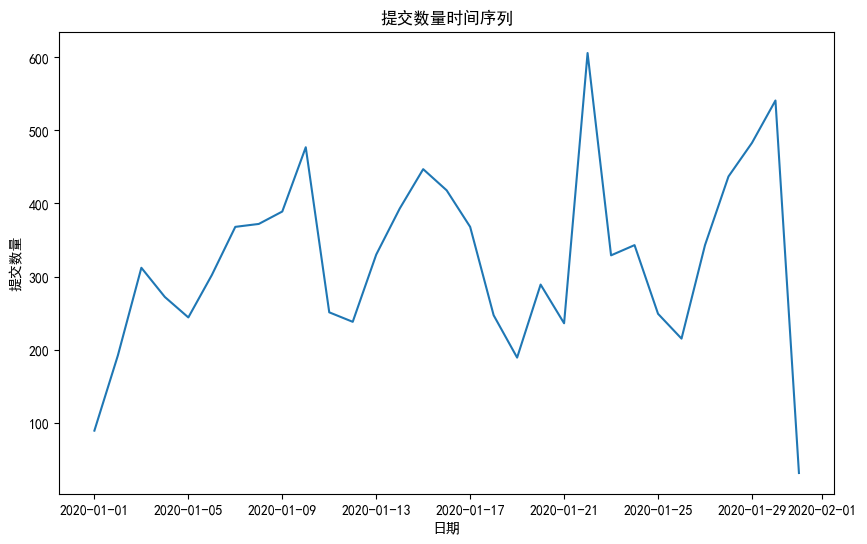

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=2.73 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=247.430, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=248.650, Time=0.39 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=248.814, Time=0.27 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=246.282, Time=0.01 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=248.799, Time=0.70 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=248.791, Time=0.13 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=246.661, Time=0.05 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=246.901, Time=0.06 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=248.552, Time=0.59 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12]          
Total fit time: 5.729 seconds


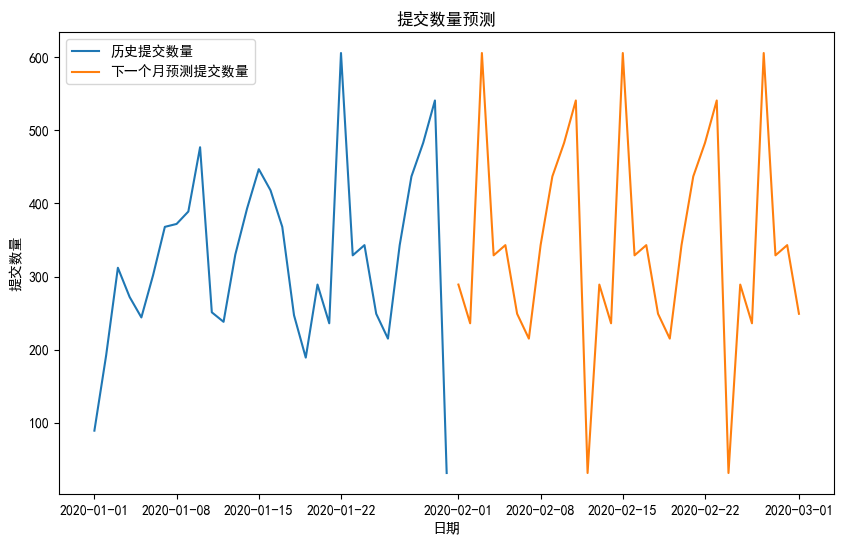

            Predicted_Submissions
2020-02-01                  289.0
2020-02-02                  236.0
2020-02-03                  606.0
2020-02-04                  329.0
2020-02-05                  343.0
2020-02-06                  249.0
2020-02-07                  215.0
2020-02-08                  343.0
2020-02-09                  437.0
2020-02-10                  483.0
2020-02-11                  541.0
2020-02-12                   31.0
2020-02-13                  289.0
2020-02-14                  236.0
2020-02-15                  606.0
2020-02-16                  329.0
2020-02-17                  343.0
2020-02-18                  249.0
2020-02-19                  215.0
2020-02-20                  343.0
2020-02-21                  437.0
2020-02-22                  483.0
2020-02-23                  541.0
2020-02-24                   31.0
2020-02-25                  289.0
2020-02-26                  236.0
2020-02-27                  606.0
2020-02-28                  329.0
2020-02-29    

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np
from pmdarima import auto_arima

# 加载数据
file_path = 'created_date_counts.csv'
data = pd.read_csv(file_path)

plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
# 查看数据前几行
print(data.head())

# 确保日期列为datetime格式
data['created_date'] = pd.to_datetime(data['created_date'])

# 按日期排序
data = data.sort_values('created_date')

# 设置日期为索引
data.set_index('created_date', inplace=True)

# 检查是否存在缺失值
print(data.isnull().sum())

# 确保没有缺失值
data = data.dropna()

# 确保数据的频率是每天
data = data.asfreq('D')

# 绘制数据
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('提交数量时间序列')
plt.xlabel('日期')
plt.ylabel('提交数量')
plt.show()

# 使用SARIMAX模型进行预测
# 设置参数
order = (1, 1, 1)  # p, d, q
seasonal_order = (1, 1, 1, 12)  # P, D, Q, s

# 拆分训练集和测试集
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# 使用auto_arima自动选择最佳的模型参数
model = auto_arima(data, seasonal=True, m=12, trace=True, suppress_warnings=True)

# 拟合模型
model.fit(data)

# 预测下一个月的提交数量
next_month_forecast = model.predict(n_periods=30)

# 将预测结果转换为DataFrame
next_month_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30)
next_month_forecast_df = pd.DataFrame(next_month_forecast, index=next_month_dates, columns=['Predicted_Submissions'])

# 绘制预测结果
plt.figure(figsize=(10, 6))
plt.plot(data, label='历史提交数量')
plt.plot(next_month_forecast_df, label='下一个月预测提交数量')
plt.title('提交数量预测')
plt.xlabel('日期')
plt.ylabel('提交数量')
plt.legend()
plt.show()

# 输出下一个月的预测结果
print(next_month_forecast_df)

# 将预测结果保存到新的CSV文件
output_file_path = 'next_month_forecast.csv'
next_month_forecast_df.to_csv(output_file_path)
print(f"预测结果已保存到 {output_file_path}")


In [1]:
# 重新进行大规模统计（200 0000行）

import pandas as pd

# 读取CSV文件
df = pd.read_csv('log_2020_01.csv' ,nrows = 1000000)

# 取前五百行
df = df.head(1000000)

# 删去不需要的列（假设你知道列名）
columns_to_keep = ['id','type', 'actor_id','actor_login',  'issue_author_type','repo_id', 'repo_name', 'created_at', 'create_description', 'pull_merged_by_type', 'repo_language']  # 替换为你需要保留的列名
df = df[columns_to_keep]

# 保存为新的CSV文件
df.to_csv('Washed1.csv', index=False)

C:\Users\23162\AppData\Local\Temp\ipykernel_12784\2542890809.py:6: DtypeWarning: Columns (8,12,13,19,23,35,42,45,48,51,55,61,62,70,73,81,82,87,89,91,92,94,96,97,106,107,108,111,116) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('log_2020_01.csv' ,nrows = 1000000)


In [2]:
import pandas as pd

# 读取CSV文件
file_path = 'Washed1.csv'
df = pd.read_csv(file_path)

# 统计repo_id的出现次数并生成CSV表格
repo_id_counts = df['repo_id'].value_counts().reset_index()
repo_id_counts.columns = ['repo_id', 'count']
result = pd.merge(repo_id_counts, df[['repo_id', 'repo_name']].drop_duplicates(), on='repo_id')
result.to_csv('repo_id_counts.csv', index=False)
print("Repo ID counts saved to repo_id_counts.csv")

# 提取created_at中的日期部分并统计频率，生成CSV表格
df['created_date'] = pd.to_datetime(df['created_at']).dt.date
date_counts = df['created_date'].value_counts().reset_index()
date_counts.columns = ['created_date', 'count']
date_counts.to_csv('created_date_counts.csv', index=False)
print("Created date counts saved to created_date_counts.csv")


C:\Users\23162\AppData\Local\Temp\ipykernel_12784\153491972.py:5: DtypeWarning: Columns (8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Repo ID counts saved to repo_id_counts.csv
Created date counts saved to created_date_counts.csv


In [3]:
import pandas as pd

# 读取CSV文件
file_path = 'Washed1.csv' 
df = pd.read_csv(file_path)

# 统计repo_language的出现次数
language_counts = df['repo_language'].value_counts().reset_index()
language_counts.columns = ['repo_language', 'count']

# 保存为新的CSV文件
language_counts.to_csv('repo_language_counts.csv', index=False)

print("Repo language counts saved to repo_language_counts.csv")

Repo language counts saved to repo_language_counts.csv


C:\Users\23162\AppData\Local\Temp\ipykernel_12784\3471448851.py:5: DtypeWarning: Columns (8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
